For species Fe(c), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 4.2881898

For species Fe(c), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 3.425820683333331

For species Fe(c), discontinuity in s/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 8.486560101557188

For species Cr(cr), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  749.1520512400002
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  113.24055562733336
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in s/R detec

AttributeError: 'Line2D' object has no property 'style'

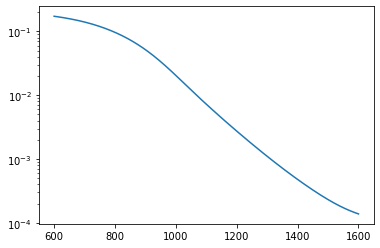

In [ ]:
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

import phases
import feedstock as fs
import fuel as fu
import gasifier as gs

In [ ]:
highvaleCoal = fs.create_fuel_stream(1, [57.2/91, 3.3/91, 16.2/91, 0.7/91, 0.2/91, 0], 13.4/91, 9/91, 21.1, 
                                    ashComposition=[54.74, 7.05, 22.86, 5.3, 1.09, 1.67, 2.14, 0.08, 1, 4.07, 0])
air3 = fs.create_air_stream(fs.convert_ER_air(highvaleCoal, 0.3))
air4 = fs.create_air_stream(fs.convert_ER_air(highvaleCoal, 0.4))
TT = np.linspace(600, 1600+1E-6, 1001)
results3 = []
results4 = []

In [ ]:
for i, T in enumerate(TT):
    outlet3 = gs.gasify_isot(highvaleCoal, air3, T, 101325)
    outlet4 = gs.gasify_isot(highvaleCoal, air4, T, 101325)
    results3.append(outlet3)
    results4.append(outlet4)

In [ ]:

plt.semilogy(TT, [out.get_gas_fraction('H2O') for out in results3])
plt.semilogy(TT, [out.get_gas_fraction('H2O') for out in results4], style='--')
plt.show()